# Berechnung der gemittelten Pitchwinkel

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cdflib
from virtual_detector import *
%matplotlib widget

In [126]:
# step_main = cdflib.CDF('data/STEP_main/2021/solo_L2_epd-step-main_20211204_V01.cdf')

In [127]:
def step_plot(self,xlabel,ylabel,title):
    '''Erzeugt den bekannten STEP-Plot mit allen 16 Pixeln. Gibt Liste mit axes zurück.'''
    fig = plt.figure(figsize = (15,10))
    fig.subplots_adjust(wspace = 0, hspace = 0)
    ax = []        
    for i in range(16):
        if i == 0:
            ax.append(fig.add_subplot(4,5,3))
        else:
            if i == 1:
                ax.append(fig.add_subplot(4,5,5+i))
            else:
                ax.append(fig.add_subplot(4,5,5+i,sharex = ax[1], sharey = ax[1]))              
            if i == 6:
                ax[i].set_ylabel(ylabel)
            if i == 13:
                ax[i].set_xlabel(xlabel)
        if i not in [0,1,6,11]:
            for t in ax[i].get_yticklabels():
                t.set_visible(False)
        if i < 11:
            for t in ax[i].get_xticklabels():
                t.set_visible(False)
    ax[0].set_title(title)
    return fig, ax

[[ 0.8412 -0.4396  0.3149]
 [ 0.8743 -0.457   0.1635]
 [ 0.8862 -0.4632 -0.    ]
 [ 0.8743 -0.457  -0.1635]
 [ 0.8412 -0.4396 -0.315 ]
 [ 0.7775 -0.5444  0.3149]
 [ 0.8082 -0.5658  0.1635]
 [ 0.8191 -0.5736  0.    ]
 [ 0.8082 -0.5659 -0.1634]
 [ 0.7775 -0.5444 -0.3149]
 [ 0.7008 -0.6401  0.3149]
 [ 0.7284 -0.6653  0.1634]
 [ 0.7384 -0.6744 -0.    ]
 [ 0.7285 -0.6653 -0.1635]
 [ 0.7008 -0.6401 -0.315 ]]


C:\Users\ebel1\AppData\Local\Temp\ipykernel_21332\1915545867.py:20: RuntimeWarning: invalid value encountered in double_scalars
  av_pw = sum/sum_hitfrac


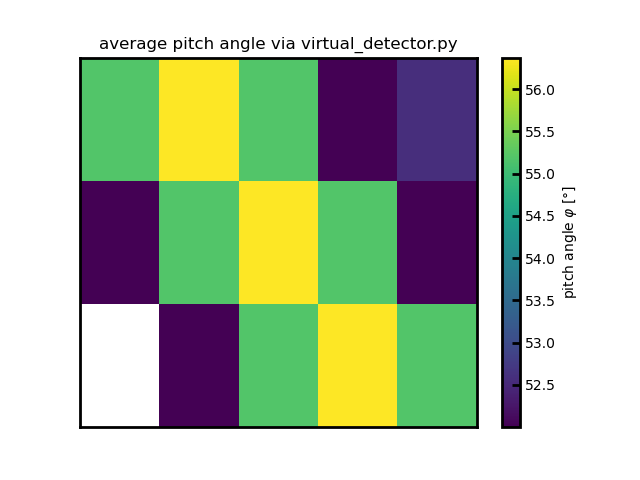

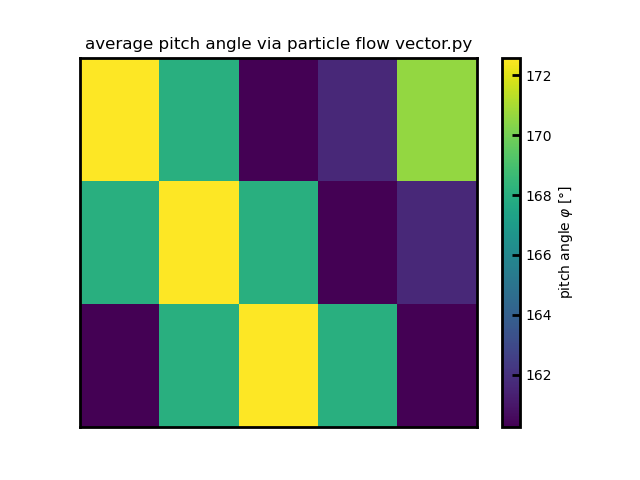

In [136]:
def pw(flow,B):
    '''Übergebe den particle flow-Vektor als Geschwindigkeit und den Magnetfeldvektor (am besten in SRF) und berechne die Pitchwinkel über das Skalarprodukt.
    Rückgabe in Radians und Grad'''
    len_flow = np.sqrt(flow[0]**2 + flow[1]**2 + flow[2]**2)
    len_B = np.sqrt(B[0]**2 + B[1]**2 + B[2]**2)
    argument = (flow[0]*B[0] + flow[1]*B[1] + flow[2]*B[2])/len_flow/len_B
    result = np.arccos(argument)
    return result, np.degrees(result)

def average_pw(self,pix):
    '''Rückgabe des Pitchwinkels in Radians und Grad'''
    sum = 0.0
    sum_hitfrac = 0.0

    for phii in range(self.cosmu.shape[0]):
        for thetai in range(self.cosmu.shape[1]):
            pitchangle = self.cosmu[phii][thetai]
            sum += self.hitfrac[pix][phii][thetai] * pitchangle
            sum_hitfrac += self.hitfrac[pix][phii][thetai]
    av_pw = sum/sum_hitfrac
    return av_pw, np.degrees(av_pw)

def plot_pw(pw_list,title):
    '''STEP-Plot mit Pitch-Winkeln.'''
    fig, ax = plt.subplots()
    x_corners = [0,1,2,3,4,5]
    y_corners = [0,1,2,3]
    tmp = ax.pcolormesh(x_corners,y_corners,pw_list)
    plt.colorbar(tmp,label=r'pitch angle $\varphi$ [°]')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(title)


B = np.array([0.8191, -0.5736, 0.])
int = VDSTEP(B=B)

pixel_list = range(16)
av_pw_list = np.zeros((3,5))

for i in range(3):
    for j in range(5):
        pixel = i+j   # Index des entsprechenden Pixels
        av_pw_list[i][j] = average_pw(int,pixel)[1]

plot_pw(av_pw_list,'average pitch angle via virtual_detector.py')


# Ich vermute, dass das Koordinatensystem aus virtual_detector.py einfach nur SRF mit gedrehtem X und Y ist.
# Lars meint, dass es einfach SRF ist
# particle-flow vector funktioniert in SRF mit und ohne Drehung komisch...
flow_vector_srf = np.array([[-0.8412,  0.4396,  0.3149], [-0.8743,  0.457,   0.1635], [-0.8862,  0.4632, -0.    ], [-0.8743,  0.457,  -0.1635], [-0.8412,  0.4396, -0.315 ], [-0.7775,  0.5444,  0.3149], [-0.8082,  0.5658,  0.1635], [-0.8191,  0.5736,  0.    ], [-0.8082,  0.5659, -0.1634], [-0.7775,  0.5444, -0.3149], [-0.7008,  0.6401,  0.3149], [-0.7284,  0.6653,  0.1634], [-0.7384,  0.6744, -0.    ], [-0.7285,  0.6653, -0.1635], [-0.7008,  0.6401, -0.315 ]])
flow_vector_lars_xyz = np.array([-1*flow_vector_srf.T[0], -1*flow_vector_srf.T[1],flow_vector_srf.T[2]]).T
print(flow_vector_lars_xyz)

pixel_list = range(16)
av_pw_list = np.zeros((3,5))

for i in range(3):
    for j in range(5):
        pixel = i+j   # Index des entsprechenden Pixels
        av_pw_list[i][j] = pw(flow_vector_srf[pixel],B)[1]

plot_pw(av_pw_list,'average pitch angle via particle flow vector.py')

0.7142857142857141
0.33219276573844064


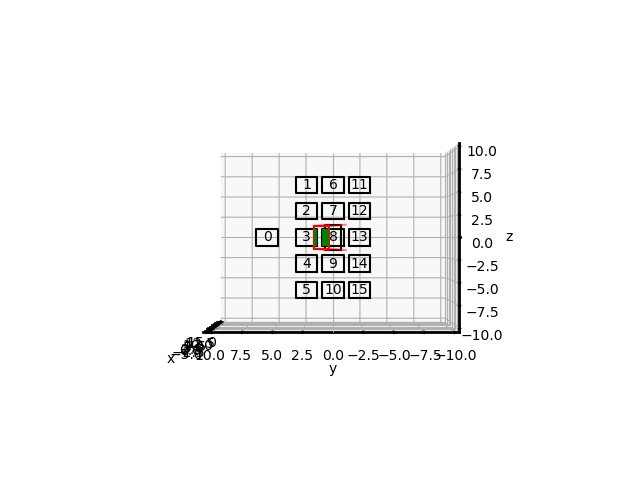

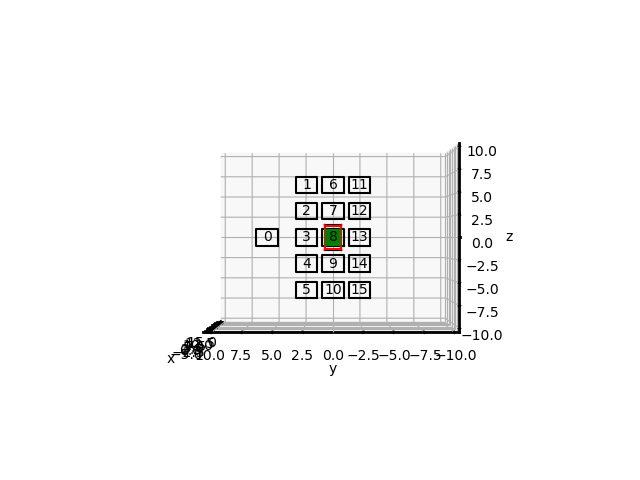

In [132]:
# int = VDSTEP()
# mag = VDSTEP(mag=True)

pix = 8
phii = 16
thetai = 30
plist = range(16)

plot_FoV(int,phii=phii,thetai=thetai,plist=plist)
print(int.hitfrac[pix][phii][thetai])

pix = 8
phii = 20
thetai = 30
plist = range(16)

plot_FoV(int,phii=phii,thetai=thetai,plist=plist)
print(int.hitfrac[pix][phii][thetai])

# plot_FoV(mag,phii=phii,thetai=thetai,plist=plist)

plt.show()